# Query for icSrc Sources Results in  OGA

 work with Weakly_2023_01
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/01/06
- update : 2023/01/19


In [56]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_01/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_01/Spectractor 	setup


In [57]:
! eups list -s lsst_distrib

   g754a7f0350+935911ccad 	current w_2023_01 setup


In [58]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [60]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [61]:
transform = AsinhStretch() + PercentileInterval(99.)

In [62]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [63]:
#my_collection = "u/dagoret/BPS_test"
my_collection = "u/dagoret/BPS_photimaging_202301"

In [64]:
#butler = butlerUtils.makeDefaultLatissButler(extraCollections=[my_collection])

## Config

In [65]:
# path index for each month
#DATE="20211103"
#filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
#filterdispersername = "FELH0600~holo4_003"

- icSrc_schema
- icExp  
- icExpBackground  
- icSrc

In [66]:
datasetRefs = registry.queryDatasets(datasetType='icSrc_schema', collections=my_collection, where= "instrument='LATISS'")
#icSrc_schema = butler.get('icSrc_schema')

## icExp

In [13]:
datasetRefs = registry.queryDatasets(datasetType='icExp', collections=my_collection, where= "instrument='LATISS'")

In [14]:
all_ref_for_icSrc = []
all_dataId = []
all_icExp  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExp ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExp = butler.get('icExp', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExp.append(icExp)
    if i > 5:
        break

========================datasetType = icExp ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700159}
visit...................: 2023011700159
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 159, 'detector': 0}
========================datasetType = icExp ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700208}
visit...................: 2023011700208
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 208, 'detector': 0}
========================datasetType = icExp ==================================

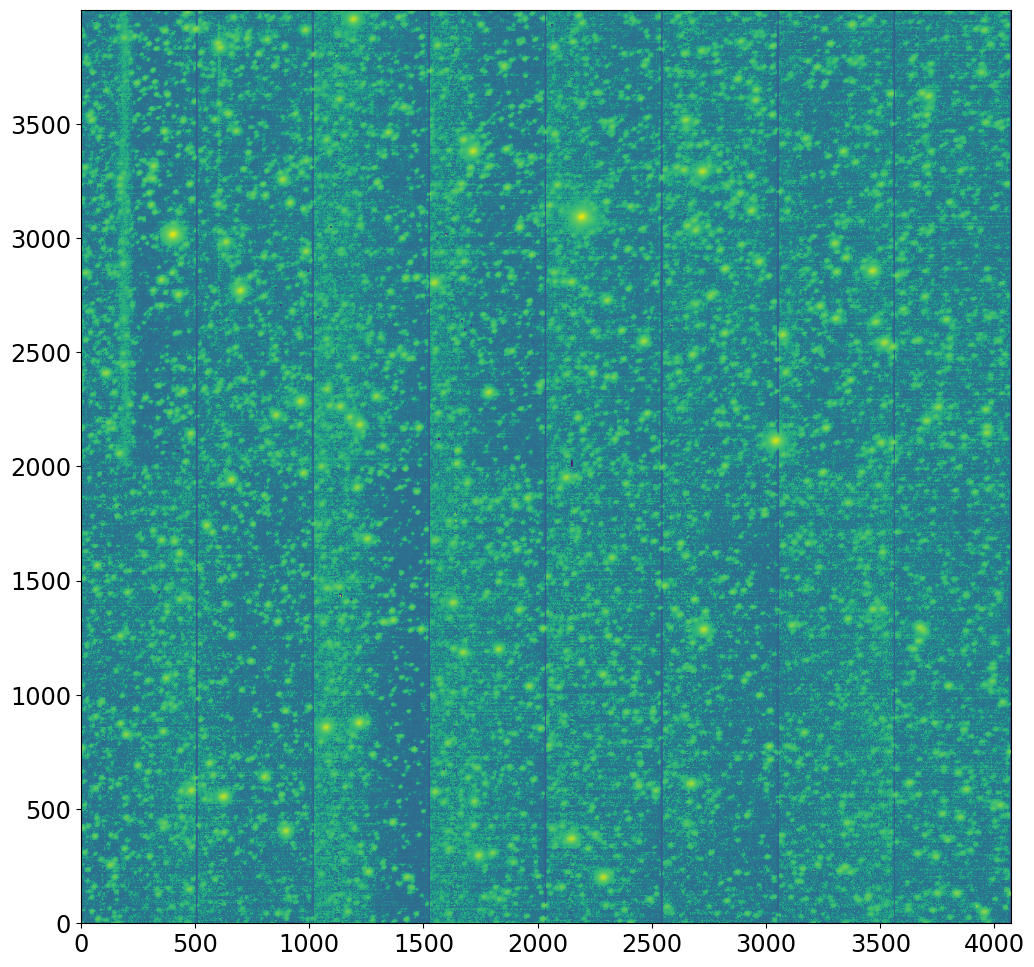

In [15]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)
#linthresh, linscale=1.0, vmin=None, vmax=None, clip=False, *, base=10
ax.imshow(icExp.getImage().array,origin="lower",norm=SymLogNorm(linthresh=1))

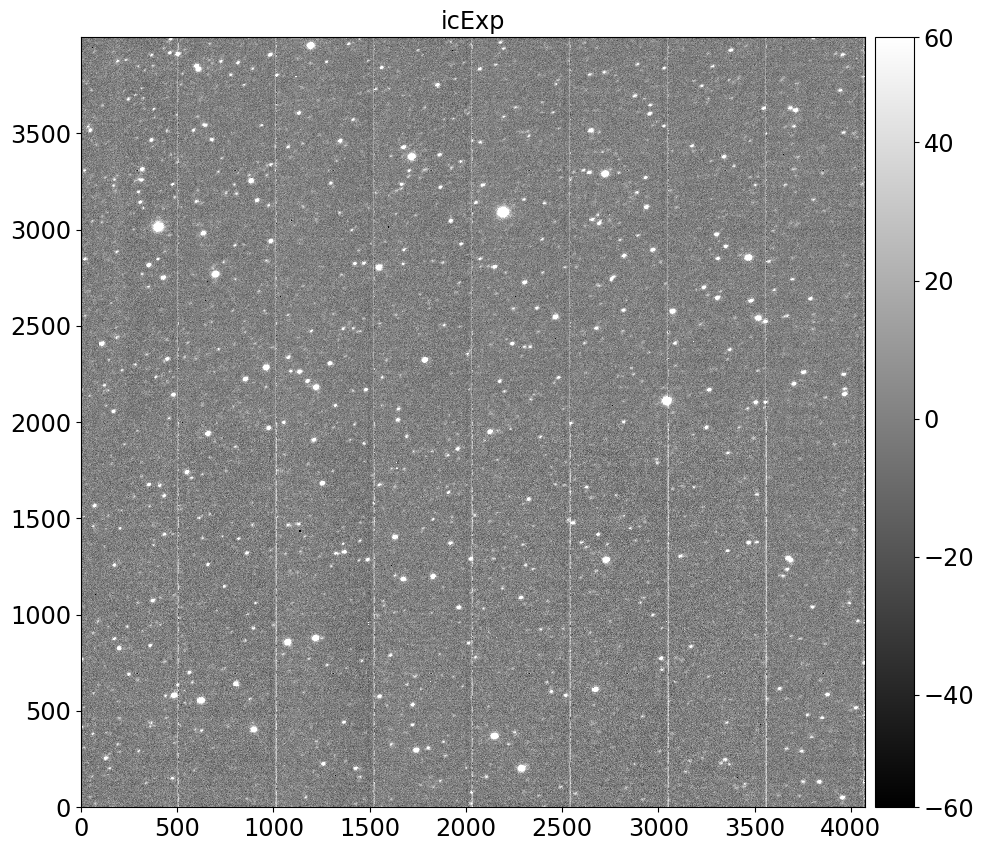

In [16]:
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExp"
afw_display.mtv(icExp.getImage(),title=the_title)

## icExpBackground

In [17]:
datasetRefs = registry.queryDatasets(datasetType='icExpBackground', collections=my_collection, where= "instrument='LATISS'")

In [18]:
all_ref_for_icExpBg  = []
all_dataId = []
all_icExpBg  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExpBackground ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExpBg = butler.get('icExpBackground', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icExpBg.append(icExpBg) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExpBg.append(icExpBg)
    if i > 5:
        break

========================datasetType = icExpBackground ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700202}
visit...................: 2023011700202
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 202, 'detector': 0}
========================datasetType = icExpBackground ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700160}
visit...................: 2023011700160
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 160, 'detector': 0}
========================datasetType = icExpBackground ====

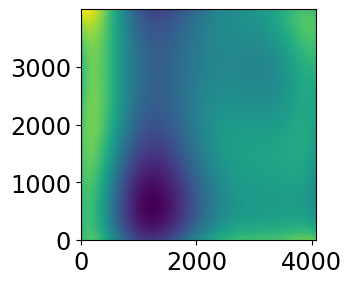

In [19]:
plt.imshow(icExpBg.getImage().array,origin="lower")

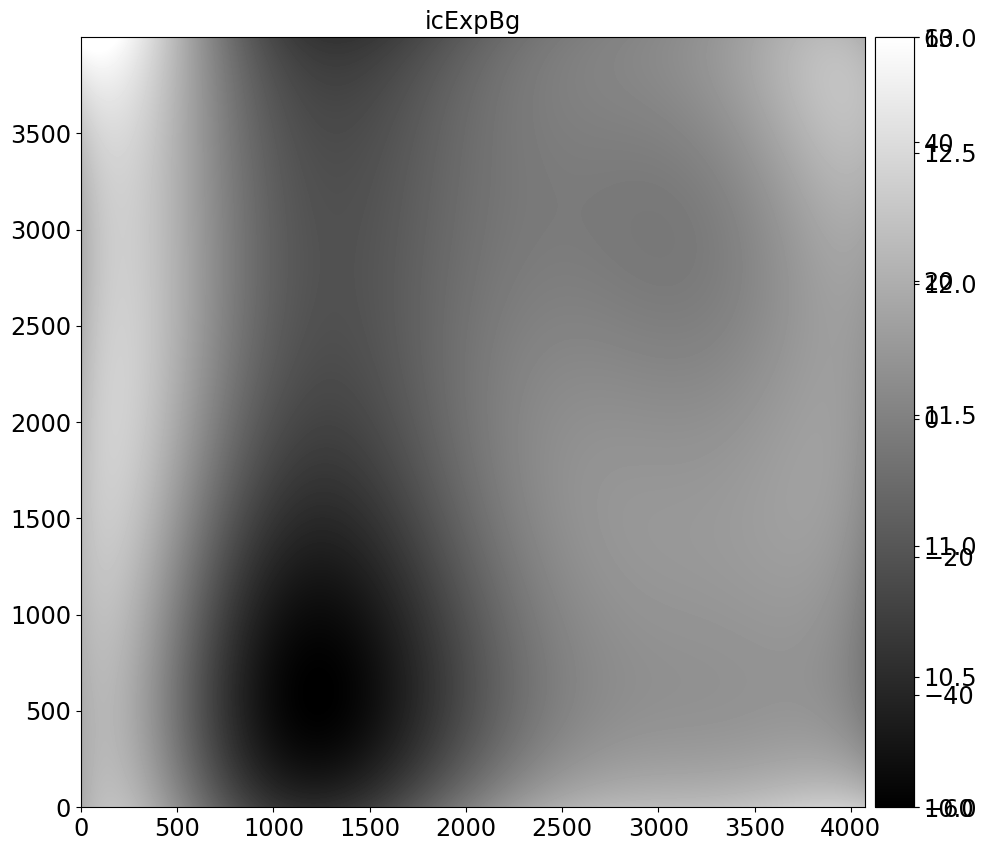

In [20]:
ig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExpBg"
afw_display.mtv(icExpBg.getImage(),title=the_title)

## icSrc

In [21]:
datasetRefs = registry.queryDatasets(datasetType='icSrc', collections=my_collection, where= "instrument='LATISS'")

In [22]:
datasetRefs.any() 

True

In [23]:
all_ref_for_icSrc = []
all_dataId = []
all_icSrc = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icSrc ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icSrc = butler.get('icSrc', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icSrc.append(icSrc) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icSrc.append(icSrc)
    if i > 5:
        break

========================datasetType = icSrc ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700154}
visit...................: 2023011700154
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 154, 'detector': 0}
========================datasetType = icSrc ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700156}
visit...................: 2023011700156
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 156, 'detector': 0}
========================datasetType = icSrc ==================================

In [24]:
table_sources = icSrc.asAstropy()
table_sources

<Table length=40>
         id         coord_ra ... base_FootprintArea_value
                      rad    ...           pix           
       int64        float64  ...          int32          
------------------- -------- ... ------------------------
2121281516538429441      nan ...                    14323
2121281516538429442      nan ...                     5688
2121281516538429443      nan ...                     8091
2121281516538429444      nan ...                     2121
2121281516538429445      nan ...                     4196
2121281516538429446      nan ...                     5483
2121281516538429447      nan ...                     3132
2121281516538429448      nan ...                     6344
2121281516538429449      nan ...                     2132
                ...      ... ...                      ...
2121281516538429471      nan ...                     2836
2121281516538429472      nan ...                     2350
2121281516538429473      nan ...                     4994
2121281516538429474      nan ...                     1879
2121281516538429475      nan ...                     2565
2121281516538429476      nan ...                     4112
2121281516538429477      nan ...                     5084
2121281516538429478      nan ...                     3544
2121281516538429479      nan ...                     3713
2121281516538429480      nan ...                     2528

## src

In [25]:
datasetRefs = butler.registry.queryDatasets(datasetType='src', collections=my_collection, where= "instrument='LATISS'")

In [26]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = src ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    src = butler.get('src', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_src.append(src)
    if i > 5:
        break

========================datasetType = src ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700148}
visit...................: 2023011700148
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 148, 'detector': 0}
========================datasetType = src ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700228}
visit...................: 2023011700228
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 228, 'detector': 0}
========================datasetType = src ========================================

In [27]:
datasetRefs.any()

True

# Sources

In [28]:
datasetRefs = butler.registry.queryDatasets(datasetType='sourceTable', collections=my_collection, where= "instrument='LATISS'")

In [29]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []
all_sourcesTables = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = sourceTable ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_visit = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0,}
    print(the_dataId)
    tab       = butler.get(ref,collections=my_collection)
    all_sourcesTables.append(tab) 
    #src = butler.get('source', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    #all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    
    #if i > 5:
    #    break

========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700190}
visit...................: 2023011700190
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 190, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700204}
visit...................: 2023011700204
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 204, 'detector': 0}
========================datasetType = sourceTable ================

In [30]:
all_sourcesTables[0]

coord_ra  coord_dec     ccdVisitId       parentSourceId  \
sourceId                                                                        
2121281516538429441  89.420770 -52.691373  2023011700190                    0   
2121281516538429442  89.442960 -52.691314  2023011700190                    0   
2121281516538429443  89.532580 -52.690340  2023011700190                    0   
2121281516538429444  89.418212 -52.688397  2023011700190                    0   
2121281516538429445  89.405873 -52.686825  2023011700190                    0   
...                        ...        ...            ...                  ...   
2121281516538429668  89.377677 -52.593478  2023011700190  2121281516538429527   
2121281516538429669  89.377401 -52.587965  2023011700190  2121281516538429535   
2121281516538429670  89.377508 -52.589619  2023011700190  2121281516538429535   
2121281516538429671  89.377592 -52.586672  2023011700190  2121281516538429535   
2121281516538429672  89.377068 -52.586756  2023011700190  2121281516538429535   

                               x            y      xErr      yErr         ra  \
sourceId                                                                       
2121281516538429441  1132.000000    29.000000       NaN       NaN  89.420770   
2121281516538429442  1638.000000    25.000000       NaN       NaN  89.442960   
2121281516538429443  3682.000000    35.000000       NaN       NaN  89.532580   
2121281516538429444  1075.009622   141.635676  0.012064  0.012581  89.418212   
2121281516538429445   794.351054   204.157401  0.031180  0.030598  89.405873   
...                          ...          ...       ...       ...        ...   
2121281516538429668   192.000000  3723.000000       NaN       NaN  89.377677   
2121281516538429669   188.074598  3930.446161  1.507361  0.697237  89.377401   
2121281516538429670   189.801940  3868.172822  0.407219  1.041372  89.377508   
2121281516538429671   193.000000  3979.000000       NaN       NaN  89.377592   
2121281516538429672   181.000000  3976.000000       NaN       NaN  89.377068   

                          decl  ...  hsmShapeRegauss_flag_galsim  \
sourceId                        ...                                
2121281516538429441 -52.691373  ...                        False   
2121281516538429442 -52.691314  ...                        False   
2121281516538429443 -52.690340  ...                        False   
2121281516538429444 -52.688397  ...                        False   
2121281516538429445 -52.686825  ...                        False   
...                        ...  ...                          ...   
2121281516538429668 -52.593478  ...                        False   
2121281516538429669 -52.587965  ...                        False   
2121281516538429670 -52.589619  ...                        False   
2121281516538429671 -52.586672  ...                        False   
2121281516538429672 -52.586756  ...                        False   

                     hsmShapeRegauss_flag_no_pixels  \
sourceId                                              
2121281516538429441                           False   
2121281516538429442                           False   
2121281516538429443                           False   
2121281516538429444                           False   
2121281516538429445                           False   
...                                             ...   
2121281516538429668                           False   
2121281516538429669                           False   
2121281516538429670                           False   
2121281516538429671                           False   
2121281516538429672                           False   

                     hsmShapeRegauss_flag_not_contained  \
sourceId                                                  
2121281516538429441                               False   
2121281516538429442                               False   
2121281516538429443                               False   
2121281516538429444            

In [54]:
print(all_sourcesTables[0].columns)
column_names = list(all_sourcesTables[0].columns.values)

Index(['coord_ra', 'coord_dec', 'ccdVisitId', 'parentSourceId', 'x', 'y',
       'xErr', 'yErr', 'ra', 'decl',
       ...
       'hsmShapeRegauss_flag_galsim', 'hsmShapeRegauss_flag_no_pixels',
       'hsmShapeRegauss_flag_not_contained',
       'hsmShapeRegauss_flag_parent_source', 'sky_source', 'detect_isPrimary',
       'visit', 'detector', 'band', 'physical_filter'],
      dtype='object', length=150)


In [55]:
column_names

['coord_ra',
 'coord_dec',
 'ccdVisitId',
 'parentSourceId',
 'x',
 'y',
 'xErr',
 'yErr',
 'ra',
 'decl',
 'calibFlux',
 'calibFluxErr',
 'ap03Flux',
 'ap03FluxErr',
 'ap03Flux_flag',
 'ap06Flux',
 'ap06FluxErr',
 'ap06Flux_flag',
 'ap09Flux',
 'ap09FluxErr',
 'ap09Flux_flag',
 'ap12Flux',
 'ap12FluxErr',
 'ap12Flux_flag',
 'ap17Flux',
 'ap17FluxErr',
 'ap17Flux_flag',
 'ap25Flux',
 'ap25FluxErr',
 'ap25Flux_flag',
 'ap35Flux',
 'ap35FluxErr',
 'ap35Flux_flag',
 'ap50Flux',
 'ap50FluxErr',
 'ap50Flux_flag',
 'ap70Flux',
 'ap70FluxErr',
 'ap70Flux_flag',
 'sky',
 'skyErr',
 'psfFlux',
 'psfFluxErr',
 'ixx',
 'iyy',
 'ixy',
 'ixxPSF',
 'iyyPSF',
 'ixyPSF',
 'ixxDebiasedPSF',
 'iyyDebiasedPSF',
 'ixyDebiasedPSF',
 'gaussianFlux',
 'gaussianFluxErr',
 'extendedness',
 'localPhotoCalib',
 'localPhotoCalib_flag',
 'localPhotoCalibErr',
 'localWcs_flag',
 'localWcs_CDMatrix_2_1',
 'localWcs_CDMatrix_1_1',
 'localWcs_CDMatrix_1_2',
 'localWcs_CDMatrix_2_2',
 'blendedness_abs',
 'blendedness_f

In [32]:
all_sourcesTables[1]

coord_ra  coord_dec     ccdVisitId  \
sourceId                                                    
2121281516553109505  124.096701   7.733262  2023011700204   
2121281516553109506  124.119576   7.758544  2023011700204   
2121281516553109507  124.146438   7.788720  2023011700204   
2121281516553109508  124.110967   7.755993  2023011700204   
2121281516553109509  124.101483   7.744291  2023011700204   
...                         ...        ...            ...   
2121281516553109719  124.050086   7.791735  2023011700204   
2121281516553109720  124.037836   7.791185  2023011700204   
2121281516553109721  124.036537   7.790170  2023011700204   
2121281516553109722  124.017663   7.800489  2023011700204   
2121281516553109723  124.018723   7.801122  2023011700204   

                          parentSourceId            x            y      xErr  \
sourceId                                                                       
2121281516553109505                    0   637.000000    23.000000       NaN   
2121281516553109506                    0  1913.120376    21.939574  0.062051   
2121281516553109507                    0  3425.214613    33.039005  0.320671   
2121281516553109508                    0  1628.000000   197.000000       NaN   
2121281516553109509                    0  1064.732706   166.835662  0.638011   
...                                  ...          ...          ...       ...   
2121281516553109719  2121281516553109578  1119.000000  2784.000000       NaN   
2121281516553109720  2121281516553109588   799.668766  3110.371207  0.343004   
2121281516553109721  2121281516553109588   739.000000  3121.000000       NaN   
2121281516553109722  2121281516553109604   559.989851  3903.918561  0.040776   
2121281516553109723  2121281516553109604   604.023352  3890.328567  0.121312   

                         yErr          ra      decl  ...  \
sourceId                                             ...   
2121281516553109505       NaN  124.096701  7.733262  ...   
2121281516553109506  0.060273  124.119576  7.758544  ...   
2121281516553109507  0.190662  124.146438  7.788720  ...   
2121281516553109508       NaN  124.110967  7.755993  ...   
2121281516553109509  0.706106  124.101483  7.744291  ...   
...                       ...         ...       ...  ...   
2121281516553109719       NaN  124.050086  7.791735  ...   
2121281516553109720  0.194389  124.037836  7.791185  ...   
2121281516553109721       NaN  124.036537  7.790170  ...   
2121281516553109722  0.076649  124.017663  7.800489  ...   
2121281516553109723  0.253698  124.018723  7.801122  ...   

                     hsmShapeRegauss_flag_galsim  \
sourceId                                           
2121281516553109505                         True   
2121281516553109506                        False   
2121281516553109507                        False   
2121281516553109508                        False   
2121281516553109509                        False   
...                                          ...   
2121281516553109719                         True   
2121281516553109720                         True   
2121281516553109721                         True   
2121281516553109722                         True   
2121281516553109723                         True   

                     hsmShapeRegauss_flag_no_pixels  \
sourceId                                              
2121281516553109505                           False   
2121281516553109506                           False   
2121281516553109507                           False   
2121281516553109508                           False   
2121281516553109509                           False   
...                                             ...   
2121281516553109719                           False   
2121281516553109720                           False   
2121281516553109721                           False   
2121281516553109722                           False   
2121281516553109723                           False   

              

In [33]:
len(all_sourcesTables[2])

1237

# srcMatch

In [34]:
datasetRefs = butler.registry.queryDatasets(datasetType='srcMatch', collections=my_collection, where= "instrument='LATISS'")

In [35]:
all_ref_for_src = []
all_dataId = []
all_srcMatch = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = srcMatch ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    srcm = butler.get('srcMatch', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_srcMatch.append(srcm)
    if i > 5:
        break

========================datasetType = srcMatch ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700189}
visit...................: 2023011700189
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 189, 'detector': 0}
========================datasetType = srcMatch ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700204}
visit...................: 2023011700204
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 204, 'detector': 0}
========================datasetType = srcMatch =========================

In [36]:
all_srcMatch[0]

<class 'lsst.afw.table.BaseCatalog'>
       first               second              distance       
------------------- ------------------- ----------------------
4792034035945604608 2121281516537380873  6.173736818225022e-08
4792034620061163776 2121281516537380879 4.9336848858503214e-08
4792034104665082496 2121281516537380880  5.815229306431073e-08
4792033378814083200 2121281516537380892 4.7854104114264916e-08
4792034104665078272 2121281516537380893 6.1455483779661535e-09
4792034173384554496 2121281516537380895  3.377339019976253e-08
4792034723140374912 2121281516537380896 4.1651974708377624e-08
4792034203447810432 2121281516537380900 1.3183300070270508e-07
4792034688780637952 2121281516537380901  2.582043758103891e-08
4792034929298800128 2121281516537380905  5.116797775713895e-08
4792035066737758208 2121281516537380906 1.9391732047183123e-08
4792035135457233408 2121281516537380907  6.196507334791541e-08
4792034929298799360 2121281516537380908 4.5203545006056044e-08
479203510109749593

# srcMatchFull

In [37]:
datasetRefs = butler.registry.queryDatasets(datasetType='srcMatchFull', collections=my_collection, where= "instrument='LATISS'")

In [38]:
all_ref_for_src = []
all_dataId = []
all_srcMatchF = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = srcMatchFull ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    srcm = butler.get('srcMatch', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_srcMatchF.append(srcm)
    if i > 5:
        break

========================datasetType = srcMatchFull ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700220}
visit...................: 2023011700220
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 220, 'detector': 0}
========================datasetType = srcMatchFull ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023011700215}
visit...................: 2023011700215
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: u/dagoret/BPS_photimaging_202301/20230118T172011Z
{'day_obs': 20230117, 'seq_num': 215, 'detector': 0}
========================datasetType = srcMatchFull =============

In [39]:
all_srcMatchF[0]

<class 'lsst.afw.table.BaseCatalog'>
       first               second              distance       
------------------- ------------------- ----------------------
3097173523569361024 2121281516569886725 2.1461732314837267e-07
3097173489209624704 2121281516569886726 1.6908940733263855e-07
3097173557929102848 2121281516569886736 1.0249349252605362e-07
3097173042533034368 2121281516569886741 1.4922422836343335e-07
3097173454849889408 2121281516569886746  3.586848177578607e-08
3097172870734355200 2121281516569886747  8.218475988672498e-08
3097173008173300480 2121281516569886752 2.7807635617407303e-07
3097173759791630976 2121281516569886755 3.0647194167624345e-08
3097173661008333312 2121281516569886761 2.9286971946634065e-07
3097173764087543040 2121281516569886762 1.4806772361941616e-07
3097174245123874304 2121281516569886763 1.8681611409247452e-07
3097173695368074112 2121281516569886768 2.6713801251662663e-08
3097173862870889472 2121281516569886769  3.964762086415228e-07
309717458442543014

# CharacterizeImage

- characterizeImage_config
- characterizeImage_metadata
- characterizeImage_log 

## characterizeImage_config

In [40]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_config', collections=my_collection, where= "instrument='LATISS'")
#conf = butler.get('characterizeImage_config')

In [41]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_config ============================================")
    print("fullId..................:",ref.dataId.full)
    cf = butler.get('characterizeImage_config', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    if i > 2:
        break

========================datasetType = characterizeImage_config ============================================
fullId..................: {}


In [42]:
cf.to_dict()

AttributeError: 'CharacterizeImageConfig' object has no attribute 'to_dict'

## characterizeImage_metadata

In [ ]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_metadata', collections=my_collection, where= "instrument='LATISS'")

In [ ]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    md = butler.get('characterizeImage_metadata', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 2:
        break

In [ ]:
md

In [ ]:
md.to_dict()

## characterizeImage_log

In [ ]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_log', collections=my_collection, where= "instrument='LATISS'")

In [ ]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    log = butler.get('characterizeImage_log', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 5:
        break

In [ ]:
print(log)